# **Welcome to the Car Price Prediction Project by Brian Maina!**
![image of a car](Assets/Images/img_1.png "Car Price Prediction")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
import joblib

In [4]:
#Loading the dataset from Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices
datasetCars = pd.read_csv('./Car_Data/Australian Vehicle Prices.csv')

# Display the first five rows of the dataset
datasetCars.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [5]:
print("\nDataset Info:")
print(datasetCars.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors  

In [7]:
print("\nDataset Description:")
print(datasetCars.describe())


Dataset Description:
               Year
count  16733.000000
mean    2016.229248
std        5.247705
min     1940.000000
25%     2013.000000
50%     2017.000000
75%     2020.000000
max     2023.000000


In [696]:
# --- Remove duplicated column dropping from the top ---
if '#' in datasetCars.columns:
    datasetCars.drop(columns=['#'], inplace=True)
if 'Unnamed: 0' in datasetCars.columns:
    datasetCars.drop(columns=['Unnamed: 0'], inplace=True)


print("--- Initial Dataset Loaded ---")
print(datasetCars.head())
print("\n--- Initial Missing Values ---")
print(datasetCars.isnull().sum())


--- Initial Dataset Loaded ---
           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Pre

In [697]:
# --- Step 1: Clean 'Price' column (removing 'POA' and converting to numeric) ---
if 'Price' in datasetCars.columns:
    print("\n--- Cleaning 'Price' column ---")
    datasetCars['Price'] = datasetCars['Price'].astype(str)
    datasetCars['Price'] = datasetCars['Price'].str.replace('POA', '', case=False, regex=False)
    datasetCars['Price'] = datasetCars['Price'].str.replace('[$,]', '', regex=True)
    datasetCars['Price'] = pd.to_numeric(datasetCars['Price'], errors='coerce')
    print("  'Price' column cleaned and converted to numeric.")
    datasetCars.dropna(subset=['Price'], inplace=True)
    print(f"  Dropped rows with NaN in 'Price'. New shape: {datasetCars.shape}")
else:
    print("\nWARNING: 'Price' column not found. Skipping price cleaning.")


--- Cleaning 'Price' column ---
  'Price' column cleaned and converted to numeric.
  Dropped rows with NaN in 'Price'. New shape: (16681, 19)


In [698]:
# --- Step 2: Robust Cleaning and Imputation for Numerical Columns ---
print("\n--- Cleaning and Imputing Numerical Columns ---")
# Removed 'CylindersinEngine' from this loop as it's better handled explicitly
# or implicitly by 'Engine_Cylinders' created from 'Engine' column.
numerical_cols_to_clean = ['Doors', 'Seats', 'FuelConsumption', 'Kilometres', 'Year']

for col in numerical_cols_to_clean:
    if col in datasetCars.columns:
        datasetCars[col] = datasetCars[col].astype(str) # Convert to string for string operations

        if col == 'Year':
            datasetCars[col] = datasetCars[col].str.extract(r'(\d{4})', expand=False)
            print(f"  Extracted 4-digit year for '{col}'.")
        elif col in ['Doors', 'Seats']:
            datasetCars[col] = datasetCars[col].str.replace(r'\D', '', regex=True)
        else: # FuelConsumption, Kilometres
            datasetCars[col] = datasetCars[col].str.replace(r'[^\d.]', '', regex=True)
            # Handle cases like '1.2.3' becoming '1.23'
            datasetCars[col] = datasetCars[col].apply(lambda x: x.split('.')[0] + '.' + ''.join(x.split('.')[1:]) if '.' in str(x) and str(x).count('.') > 1 else x)


        # Convert to numeric
        datasetCars[col] = pd.to_numeric(datasetCars[col], errors='coerce')

        if datasetCars[col].isnull().any():
            median_val = datasetCars[col].median()
            # If median_val is NaN (e.g., all values were unparseable), provide a robust fallback
            if pd.isna(median_val):
                print(f"  WARNING: Median for '{col}' is NaN, using 0 as fallback.")
                median_val = 0 # Sensible fallback for most numerical cols, adjust if needed
            datasetCars[col] = datasetCars[col].fillna(median_val)
            print(f"  Imputed '{col}' with median: {median_val}")

        # Ensure final integer type
        if col in ['Doors', 'Seats', 'Year']:
            datasetCars[col] = datasetCars[col].astype(int)
    else:
        print(f"  WARNING: Numerical column '{col}' not found. Skipping.")



--- Cleaning and Imputing Numerical Columns ---
  Imputed 'Doors' with median: 4.0
  Imputed 'Seats' with median: 5.0
  Imputed 'FuelConsumption' with median: 7.91
  Imputed 'Kilometres' with median: 86114.0
  Extracted 4-digit year for 'Year'.


In [699]:
# Correct specific 'Doors' and 'Seats' anomalies
if 'Doors' in datasetCars.columns:
    datasetCars['Doors'] = np.where(datasetCars['Doors'] >= 10, 4, datasetCars['Doors'])
    print("  Adjusted 'Doors' values >=10 to 4 (assuming data entry error).")
if 'Seats' in datasetCars.columns:
    datasetCars['Seats'] = np.where(datasetCars['Seats'] >= 10, 5, datasetCars['Seats'])
    print("  Adjusted 'Seats' values >=10 to 5 (assuming data entry error).")


  Adjusted 'Doors' values >=10 to 4 (assuming data entry error).
  Adjusted 'Seats' values >=10 to 5 (assuming data entry error).


In [700]:
# --- New Step: Clean 'Engine' and 'Model' Columns ---
print("\n--- Cleaning 'Engine', 'Model', 'Car/Suv', and 'Title' columns ---")

# 1. Process 'Engine' column: Extract cylinders and liters
if 'Engine' in datasetCars.columns:
    # --- Extract and clean Engine_Cylinders ---
    # Extract number of cylinders using multiple patterns
    temp_cylinders_str = datasetCars['Engine'].astype(str).str.extract(r'(\d+)\s*cyl', expand=False).fillna(
        datasetCars['Engine'].astype(str).str.extract(r'V(\d+)', expand=False) # for "V6" etc.
    ).fillna(
        datasetCars['Engine'].astype(str).str.extract(r'^(\d+)$', expand=False) # for just "4"
    )
    temp_cylinders_str = temp_cylinders_str.replace('', np.nan).str.strip()

    # Convert to numeric first
    numeric_cylinders = pd.to_numeric(temp_cylinders_str, errors='coerce')

    # Calculate mode ONLY from the numeric values (and handle if all are NaN)
    if not numeric_cylinders.isnull().all():
        mode_cylinders = numeric_cylinders.mode()[0]
    else:
        mode_cylinders = 4 # Common default for cars if no cylinders could be parsed
        print("  WARNING: All 'Engine_Cylinders' values were unparseable, defaulting mode to 4.")

    # Fill NaNs with the calculated mode
    datasetCars['Engine_Cylinders'] = numeric_cylinders.fillna(mode_cylinders).astype(int)
    print("  Extracted and cleaned 'Engine_Cylinders'.")


    # --- Extract and clean Engine_Liters ---
    # Extract engine volume in liters using multiple patterns
    temp_liters_str = datasetCars['Engine'].astype(str).str.extract(r'(\d+\.?\d*)\s*L', expand=False).fillna(
        datasetCars['Engine'].astype(str).str.extract(r'(\d+\.?\d*)\s*Litres', expand=False) # for "Litres"
    )
    temp_liters_str = temp_liters_str.replace('', np.nan).str.strip()

    # Convert to numeric first
    numeric_liters = pd.to_numeric(temp_liters_str, errors='coerce')

    # Calculate median ONLY from the numeric values (and handle if all are NaN)
    if not numeric_liters.isnull().all():
        median_liters = numeric_liters.median()
    else:
        median_liters = 2.0 # Common default for general car engine size
        print("  WARNING: All 'Engine_Liters' values were unparseable, defaulting median to 2.0.")

    # Fill NaNs with the calculated median
    datasetCars['Engine_Liters'] = numeric_liters.fillna(median_liters)
    print("  Extracted and cleaned 'Engine_Liters'.")

    # Drop the original 'Engine' column (as its info is now in Engine_Cylinders and Engine_Liters)
    datasetCars.drop(columns=['Engine'], inplace=True)
    print("  Dropped original 'Engine' column.")
else:
    print("WARNING: 'Engine' column not found. Skipping engine feature extraction.")



--- Cleaning 'Engine', 'Model', 'Car/Suv', and 'Title' columns ---
  Extracted and cleaned 'Engine_Cylinders'.
  Extracted and cleaned 'Engine_Liters'.
  Dropped original 'Engine' column.


In [701]:
# Handle the original 'CylindersinEngine' column if it exists and is separate from 'Engine' derived ones
# If 'Engine' column was processed, 'Engine_Cylinders' is likely preferred.
# This part assumes CylindersinEngine might still be present and needs cleaning/imputation.
if 'CylindersinEngine' in datasetCars.columns:
    if datasetCars['CylindersinEngine'].dtype == 'object': # If it's still string/object after initial cleaning loop
        datasetCars['CylindersinEngine'] = datasetCars['CylindersinEngine'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

    datasetCars['CylindersinEngine'] = pd.to_numeric(datasetCars['CylindersinEngine'], errors='coerce')

    if datasetCars['CylindersinEngine'].isnull().any():
        mode_val_cyl = datasetCars['CylindersinEngine'].mode()[0] if not datasetCars['CylindersinEngine'].isnull().all() else 4
        datasetCars['CylindersinEngine'] = datasetCars['CylindersinEngine'].fillna(mode_val_cyl)
        print(f"  Imputed 'CylindersinEngine' with mode: {mode_val_cyl}")
    datasetCars['CylindersinEngine'] = datasetCars['CylindersinEngine'].astype(int)
    print("  Cleaned and ensured 'CylindersinEngine' is integer.")
else:
    print("  'CylindersinEngine' column not found or already handled.")

  Imputed 'CylindersinEngine' with mode: 4.0
  Cleaned and ensured 'CylindersinEngine' is integer.


In [702]:
# 2. Drop the problematic 'Car/Suv' column
if 'Car/Suv' in datasetCars.columns:
    datasetCars.drop(columns=['Car/Suv'], inplace=True)
    print("  Dropped problematic 'Car/Suv' column (using 'BodyType' instead).")
else:
    print("  'Car/Suv' column not found or already dropped.")

  Dropped problematic 'Car/Suv' column (using 'BodyType' instead).


In [703]:
# 3. Handle 'Model' column cardinality
if 'Model' in datasetCars.columns:
    top_n_models = 350 # You can adjust this number
    top_models = datasetCars['Model'].value_counts().nlargest(top_n_models).index
    datasetCars['Model'] = np.where(datasetCars['Model'].isin(top_models), datasetCars['Model'], 'Other_Model')
    print(f"  Reduced 'Model' cardinality to top {top_n_models} models + 'Other_Model'.")
    print("  New 'Model' value counts (top 5):")
    print(datasetCars['Model'].value_counts().head())
else:
    print("WARNING: 'Model' column not found. Skipping model cardinality reduction.")

  Reduced 'Model' cardinality to top 350 models + 'Other_Model'.
  New 'Model' value counts (top 5):
Model
Other_Model    832
Hilux          430
Corolla        405
Ranger         398
Landcruiser    370
Name: count, dtype: int64


In [704]:
# 4. Handle 'Title' column (usually best to drop unless specific features can be extracted)
if 'Title' in datasetCars.columns:
    datasetCars.drop(columns=['Title'], inplace=True)
    print("  Dropped 'Title' column (assuming it's redundant/too high cardinality).")
else:
    print("  'Title' column not found or already dropped.")

  Dropped 'Title' column (assuming it's redundant/too high cardinality).


In [705]:
# --- Step 3: Re-evaluate ColourExtInt Cleaning (new, more robust method) ---
print("\n--- Re-evaluating 'ColourExtInt' column ---")

if 'ColourExtInt' in datasetCars.columns:
    def get_exterior_color(text):
        text = str(text).lower().strip()
        common_colors = ['black', 'white', 'grey', 'gray', 'silver', 'blue', 'red',
                         'green', 'brown', 'orange', 'gold', 'beige', 'bronze',
                         'purple', 'yellow', 'cream', 'burgundy', 'champagne', 'charcoal', 'metallic']
        for color in common_colors:
            if text.startswith(color) or f"{color} /" in text:
                return color.capitalize()
        if '/' in text:
            ext_part = text.split('/')[0].strip()
            for color in common_colors:
                if color in ext_part:
                    return color.capitalize()
        return 'Other/Unknown'

    def get_interior_info(text):
        text = str(text).lower().strip()
        interior_material = 'Other/Unknown Material' # Initialize here

        # Broader Leather/Premium Material
        if any(keyword in text for keyword in ['leather', 'nappa', 'alcantara', 'suede', 'dinamica', 'sensatec',
                                               'faux leather', 'leatherette', 'vinyl', 'pleather', 'premium',
                                               'perforated', 'merino', 'lounge']):
            interior_material = 'Leather/Premium Material'
        # Broader Cloth/Fabric
        elif any(keyword in text for keyword in ['cloth', 'fabric', 'velour', 'textile', 'woven', 'nylon', 'polyester', 'tweed']):
            interior_material = 'Cloth'

        interior_color = 'Unknown' # Initialize here, moved from incorrect spot

        interior_colors = ['black', 'white', 'grey', 'gray', 'silver', 'blue', 'red',
                           'green', 'brown', 'orange', 'gold', 'beige', 'cream', 'tan',
                           'charcoal', 'ebony', 'macchiato', 'truffle', 'cognac', 'titanium',
                           'off-white', 'ivory', 'saddle', 'chocolate', 'mocha', 'platinum',
                           'ash', 'stone', 'burgundy', 'navy', 'terra', 'espresso', 'oyster']
        if '/' in text:
            int_part = text.split('/')[1].strip() # Changed from [-1] to [1] for consistency after split
            for color in interior_colors:
                if color in int_part:
                    interior_color = color.capitalize()
                    break
        if interior_color == 'Unknown':
            ext_col = get_exterior_color(text).lower() # Call the external function
            for color in interior_colors:
                if color in text and color != ext_col:
                    interior_color = color.capitalize()
                    break
        return interior_material, interior_color


    datasetCars['Exterior_Color'] = datasetCars['ColourExtInt'].apply(get_exterior_color)
    datasetCars['Interior_Material'], datasetCars['Interior_Color'] = zip(*datasetCars['ColourExtInt'].apply(get_interior_info))

    datasetCars.drop(columns=['ColourExtInt'], inplace=True)
    print("  'ColourExtInt' replaced with 'Exterior_Color', 'Interior_Material', 'Interior_Color'.")
    print("  New 'Exterior_Color' value counts (top 5):")
    print(datasetCars['Exterior_Color'].value_counts().head())
    print("\n  New 'Interior_Material' value counts:")
    print(datasetCars['Interior_Material'].value_counts())
    print("\n  New 'Interior_Color' value counts (top 5):")
    print(datasetCars['Interior_Color'].value_counts().head())
else:
    print("\nWARNING: 'ColourExtInt' column not found. Skipping detailed color cleaning.")

# --- Step 4: Impute Other Categorical Columns with Mode ---
print("\n--- Imputing Other Categorical Columns with Mode ---")
# Exclude columns that are dropped or handled specifically
categorical_cols_to_impute_mode = [
    'BodyType', 'Brand', 'Transmission', 'DriveType', 'FuelType', 'UsedOrNew', 'Location'
]

for col in categorical_cols_to_impute_mode:
    if col in datasetCars.columns and datasetCars[col].isnull().any():
        mode_val = datasetCars[col].mode()[0]
        datasetCars[col] = datasetCars[col].fillna(mode_val)
        print(f"  Imputed '{col}' with mode: '{mode_val}'")
    elif col not in datasetCars.columns:
        print(f"  WARNING: Categorical column '{col}' not found. Skipping.")


--- Re-evaluating 'ColourExtInt' column ---
  'ColourExtInt' replaced with 'Exterior_Color', 'Interior_Material', 'Interior_Color'.
  New 'Exterior_Color' value counts (top 5):
Exterior_Color
White     5964
Silver    2308
Grey      2257
Black     1937
Blue      1572
Name: count, dtype: int64

  New 'Interior_Material' value counts:
Interior_Material
Other/Unknown Material      15117
Leather/Premium Material      853
Cloth                         711
Name: count, dtype: int64

  New 'Interior_Color' value counts (top 5):
Interior_Color
Unknown     8991
Black       5655
Grey        1592
Beige        135
Charcoal      55
Name: count, dtype: int64

--- Imputing Other Categorical Columns with Mode ---
  Imputed 'BodyType' with mode: 'SUV'
  Imputed 'Location' with mode: 'Minchinbury, NSW'


In [706]:
# --- Final Verification: Missing Values AFTER ALL Imputation ---
print("\n--- Missing Values AFTER ALL Imputation ---")
remaining_nans = datasetCars.isnull().sum()[datasetCars.isnull().sum() > 0]
if remaining_nans.empty:
    print("No missing values remaining in the dataset.")
else:
    print(remaining_nans)

# Optional: Display info and head of cleaned data
print("\n--- Cleaned Dataset Info ---")
datasetCars.info()
print("\n--- Cleaned Dataset Head ---")
print(datasetCars.head())


--- Missing Values AFTER ALL Imputation ---
No missing values remaining in the dataset.

--- Cleaned Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 16681 entries, 0 to 16733
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16681 non-null  object 
 1   Year               16681 non-null  int64  
 2   Model              16681 non-null  object 
 3   UsedOrNew          16681 non-null  object 
 4   Transmission       16681 non-null  object 
 5   DriveType          16681 non-null  object 
 6   FuelType           16681 non-null  object 
 7   FuelConsumption    16681 non-null  float64
 8   Kilometres         16681 non-null  float64
 9   Location           16681 non-null  object 
 10  CylindersinEngine  16681 non-null  int64  
 11  BodyType           16681 non-null  object 
 12  Doors              16681 non-null  int64  
 13  Seats              16681 non-null  int64  
 14  Pric

In [707]:
unique_values = {}

# List of categorical columns used in your model
# Ensure these match the 'categorical_cols' list in your Streamlit app
categorical_cols_for_app = [
    'Brand', 'Transmission', 'UsedOrNew', 'Model',
    'Exterior_Color', 'Interior_Material', 'Interior_Color',
    'Location', 'BodyType', 'DriveType', 'FuelType'
]

for col in categorical_cols_for_app:
    if col in datasetCars.columns: # Use datasetCars (or your dataframe variable before OHE)
        unique_values[col] = sorted(datasetCars[col].dropna().unique().tolist()) # Store sorted unique values

        # Define a default for unseen categories (important for the app)
        if col == 'Model':
            # If you applied a 'top_n_models' logic, ensure 'Other_Model' is a default
            unique_values[f"{col}_default"] = 'Other_Model'
        elif col in ['Exterior_Color', 'Interior_Material', 'Interior_Color']:
            unique_values[f"{col}_default"] = 'Other/Unknown' # Or 'Unknown', 'Other/Unknown Material'
        else:
            # For other categorical columns, use the most frequent value (mode) as default
            if not datasetCars[col].empty:
                unique_values[f"{col}_default"] = datasetCars[col].mode()[0]
            else:
                unique_values[f"{col}_default"] = 'Unknown' # Fallback if column is empty


# Special handling for Model by Brand for filtered dropdowns in the app
# This creates a dictionary where keys are brands and values are lists of models for that brand
if 'Brand' in datasetCars.columns and 'Model' in datasetCars.columns:
    # Filter out NaN models and ensure 'Other_Model' is considered if applicable
    model_by_brand_data = datasetCars.dropna(subset=['Brand', 'Model'])
    unique_values['Model_by_Brand'] = model_by_brand_data.groupby('Brand')['Model'] \
        .apply(lambda x: sorted(x.unique().tolist())).to_dict()

    # Ensure 'Other_Model' is added to brand-specific lists if it exists in the overall model list
    if 'Other_Model' in unique_values.get('Model', []):
        for brand_key in unique_values['Model_by_Brand']:
            if 'Other_Model' not in unique_values['Model_by_Brand'][brand_key]:
                unique_values['Model_by_Brand'][brand_key].append('Other_Model')
                unique_values['Model_by_Brand'][brand_key].sort()

# Save the dictionary of unique values
joblib.dump(unique_values, 'unique_values.joblib')
print("  Unique categorical values and mappings saved as 'unique_values.joblib'.")

  Unique categorical values and mappings saved as 'unique_values.joblib'.


In [708]:
# --- Define Numerical and Categorical Columns for Encoding/Scaling ---
# These lists define how columns will be treated moving forward
numerical_features = [
    'Year', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', 'FuelConsumption', 'Engine_Cylinders', 'Engine_Liters'
]


In [709]:
# Define categorical columns for one-hot encoding
categorical_cols = [
    'Brand', 'Transmission', 'UsedOrNew', 'Model',
    'Exterior_Color', 'Interior_Material', 'Interior_Color',
    'Location', 'BodyType', 'DriveType', 'FuelType'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(datasetCars, columns=categorical_cols, drop_first=True)

print("\n--- Data Head after One-Hot Encoding ---")
print(df_encoded.head())


--- Data Head after One-Hot Encoding ---
   Year  FuelConsumption  Kilometres  CylindersinEngine  Doors  Seats  \
0  2022             8.71      5595.0                  4      4      7   
1  2022             6.71        16.0                  4      5      5   
2  2022             6.61      8472.0                  4      2      4   
3  2011         11100.00    136517.0                  8      2      4   
4  2022          6100.00      1035.0                  4      4      5   

      Price  Engine_Cylinders  Engine_Liters  Brand_Alfa  ...  \
0   51990.0                 4            2.2       False  ...   
1   19990.0                 4            1.5       False  ...   
2  108988.0                 4            2.0       False  ...   
3   32990.0                 8            5.5       False  ...   
4   34990.0                 4            1.3       False  ...   

   DriveType_Other  DriveType_Rear  FuelType_Diesel  FuelType_Electric  \
0            False           False             True   

In [710]:
# --- DEFINE X AND Y ---
# Ensure 'Title' and 'Car/Suv' are removed if they still exist (they should have been dropped)
X = df_encoded.drop(columns=['Price'], errors='ignore')

# Check if 'Title' or 'Car/Suv' columns still exist in X and drop if so (just in case previous steps failed)
if 'Title' in X.columns:
    X = X.drop(columns=['Title'])
    print("Dropped 'Title' from X as it was not removed previously.")
if 'Car/Suv' in X.columns:
    X = X.drop(columns=['Car/Suv'])
    print("Dropped 'Car/Suv' from X as it was not removed previously.")


y = df_encoded['Price']
original_feature_names = X.columns.tolist()


print(f"\n--- Features (X) Selected ---")
print(X.columns.tolist())


--- Features (X) Selected ---
['Year', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', 'Engine_Cylinders', 'Engine_Liters', 'Brand_Alfa', 'Brand_Aston', 'Brand_Audi', 'Brand_BMW', 'Brand_BYD', 'Brand_Bentley', 'Brand_Caterham', 'Brand_Chery', 'Brand_Chevrolet', 'Brand_Chrysler', 'Brand_Citroen', 'Brand_Cupra', 'Brand_Daewoo', 'Brand_Daihatsu', 'Brand_Datsun', 'Brand_Dodge', 'Brand_FPV', 'Brand_Ferrari', 'Brand_Fiat', 'Brand_Ford', 'Brand_Foton', 'Brand_GWM', 'Brand_Geely', 'Brand_Genesis', 'Brand_Great', 'Brand_HSV', 'Brand_Haval', 'Brand_Hino', 'Brand_Holden', 'Brand_Honda', 'Brand_Hummer', 'Brand_Hyundai', 'Brand_Ineos', 'Brand_Infiniti', 'Brand_International', 'Brand_Isuzu', 'Brand_Iveco', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Kia', 'Brand_LDV', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Lexus', 'Brand_Lotus', 'Brand_MG', 'Brand_Mahindra', 'Brand_Maserati', 'Brand_Mazda', 'Brand_McLaren', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',

In [711]:
# Final check for any non-numeric columns in X
# This should now ideally show no non-numeric columns
non_numeric_cols_in_X = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols_in_X) > 0:
    print(f"\nWARNING: Non-numeric columns still found in X (After all processing): {non_numeric_cols_in_X.tolist()}")
else:
    print("\nAll features in X are numeric. Good to proceed with modeling!")



All features in X are numeric. Good to proceed with modeling!


In [712]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [713]:
# --- Save the scaler ---
joblib.dump(scaler, 'scaler.joblib')
print("  Scaler saved as 'scaler.joblib'.")


# Feature selection
selector = SelectFromModel(RandomForestRegressor(n_estimators=50, random_state=42), max_features=100)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled) # Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()

# --- Save the selected feature names ---
joblib.dump(selected_feature_names, 'selected_features.joblib')
print("  Selected feature names saved as 'selected_features.joblib'.")

  Scaler saved as 'scaler.joblib'.
  Selected feature names saved as 'selected_features.joblib'.


In [714]:
# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()

In [715]:
print(f"\n--- Number of Selected Features: {X_train_selected.shape[1]} ---")
# Print shapes
print("\n--- Training and Testing Data Split Shapes ---")
print("X_train shape:", X_train_selected.shape)
print("X_test shape:", X_test_selected.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


--- Number of Selected Features: 77 ---

--- Training and Testing Data Split Shapes ---
X_train shape: (13344, 77)
X_test shape: (3337, 77)
y_train shape: (13344,)
y_test shape: (3337,)


In [716]:
# --- Implementing XGBoost for Car Price Prediction ---
print("\n--- Implementing and Tuning XGBoost Regression Model ---")

# Define parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5], # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1], # L1 regularization term on weights
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1] # L2 regularization term on weights
}



--- Implementing and Tuning XGBoost Regression Model ---


In [717]:
# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42, tree_method='hist', enable_categorical=False), # Use 'hist' for faster training, disable_categorical since we already one-hot encoded
    param_distributions=param_dist_xgb,
    n_iter=50, # Number of parameter settings that are sampled. More is better but takes longer.
    cv=5, # 5-fold cross-validation
    scoring='neg_mean_squared_error', # For regression, use negative MSE
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("\n--- Starting RandomizedSearchCV for XGBoost ---")
# Fit RandomizedSearchCV on the training data with selected features
random_search_xgb.fit(X_train_selected, y_train)

print("\n--- RandomizedSearchCV for XGBoost Complete ---")

# Get the best parameters and best score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = np.sqrt(-random_search_xgb.best_score_) # Convert negative MSE back to RMSE

print(f"\nBest Parameters for XGBoost: {best_params_xgb}")
print(f"Best Cross-Validation RMSE for XGBoost: {best_score_xgb:.2f}")

# Retrieve the best estimator
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best model on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test_selected) # This is the correct variable to use
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"\n--- Best XGBoost Model Performance on Test Set (after Tuning) ---")
print(f"Root Mean Squared Error (RMSE): {rmse_best_xgb:.2f}")
print(f"R-squared (R2 Score): {r2_best_xgb:.4f}")

# --- Save the best performing XGBoost model ---
print("\n--- Saving the Best Tuned XGBoost Model ---")
joblib.dump(best_xgb_model, 'tuned_xgboost_car_price_model_selected_features.pkl')
print("  Tuned XGBoost model saved as 'tuned_xgboost_car_price_model_selected_features.pkl'.")


--- Starting RandomizedSearchCV for XGBoost ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. Se


--- RandomizedSearchCV for XGBoost Complete ---

Best Parameters for XGBoost: {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}
Best Cross-Validation RMSE for XGBoost: 17672.94

--- Best XGBoost Model Performance on Test Set (after Tuning) ---
Root Mean Squared Error (RMSE): 14628.56
R-squared (R2 Score): 0.8483

--- Saving the Best Tuned XGBoost Model ---
  Tuned XGBoost model saved as 'tuned_xgboost_car_price_model_selected_features.pkl'.


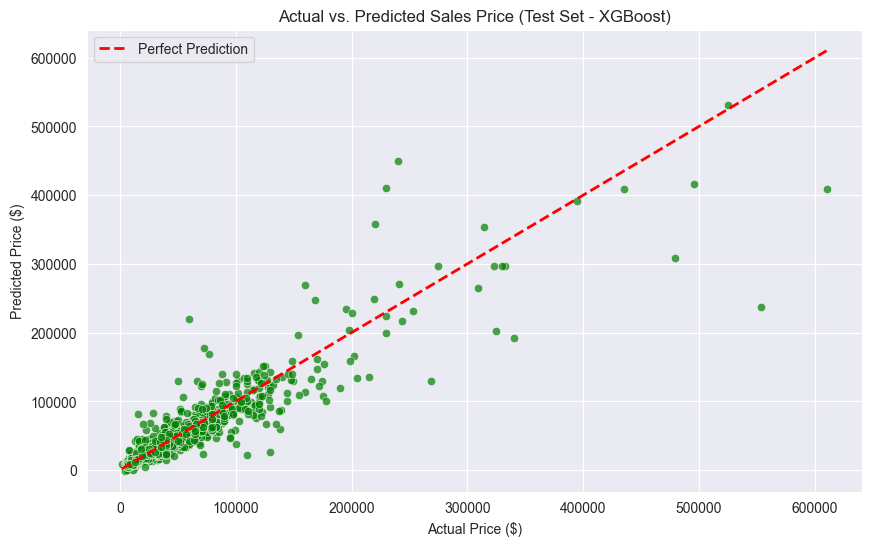

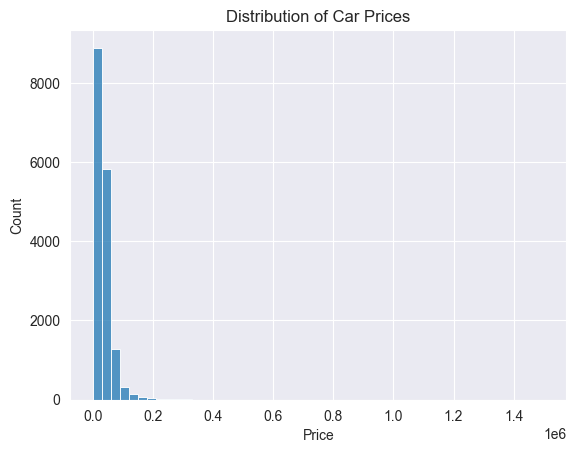

In [718]:
# Plotting actual vs predicted (XGBoost)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_xgb, alpha=0.7, color='green') # Corrected variable name here
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Sales Price (Test Set - XGBoost)")
plt.grid(True)
plt.legend()
plt.show()

sns.histplot(datasetCars['Price'], bins=50)
plt.title("Distribution of Car Prices")
plt.show()

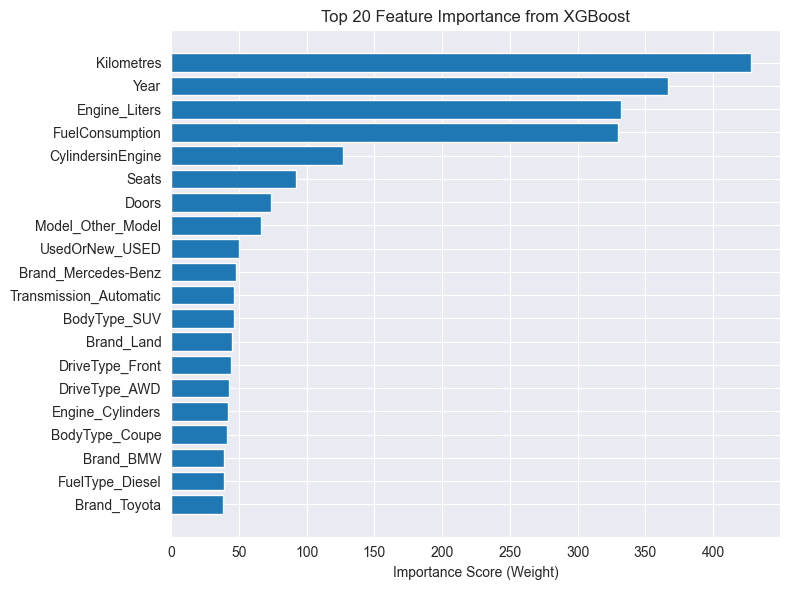


--- Top 20 Feature Importances ---
Kilometres: 428.0
Year: 367.0
Engine_Liters: 332.0
FuelConsumption: 330.0
CylindersinEngine: 127.0
Seats: 92.0
Doors: 74.0
Model_Other_Model: 66.0
UsedOrNew_USED: 50.0
Brand_Mercedes-Benz: 48.0
Transmission_Automatic: 46.0
BodyType_SUV: 46.0
Brand_Land: 45.0
DriveType_Front: 44.0
DriveType_AWD: 43.0
Engine_Cylinders: 42.0
BodyType_Coupe: 41.0
Brand_BMW: 39.0
FuelType_Diesel: 39.0
Brand_Toyota: 38.0


In [719]:
# Feature importance from XGBoost
xgb_model = random_search_xgb.best_estimator_

# Extract feature importances
feature_importances = xgb_model.get_booster().get_score(importance_type='weight')

# Map feature indices to names using the 'selected_feature_names'
# The feature names in feature_importances are 'f0', 'f1', 'f2', etc.
mapped_importances = []
for f_idx_str, score in feature_importances.items():
    f_idx = int(f_idx_str.replace('f', ''))
    if f_idx < len(selected_feature_names):
        mapped_importances.append((selected_feature_names[f_idx], score))

# Sort by importance
mapped_importances = sorted(mapped_importances, key=lambda x: x[1], reverse=True)[:20]

# Create custom bar plot
fig, ax = plt.subplots(figsize=(8, 6))
features, scores = zip(*mapped_importances)
y_pos = np.arange(len(features))
ax.barh(y_pos, scores, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # Highest importance at the top
ax.set_xlabel('Importance Score (Weight)')
plt.title('Top 20 Feature Importance from XGBoost') # Changed title to be more specific
plt.tight_layout()
plt.show()

# Print top 20 feature importances
print("\n--- Top 20 Feature Importances ---")
for name, score in mapped_importances:
    print(f"{name}: {score}")


In [720]:
# --- Save the trained pipeline ---
joblib.dump(xgb_model, 'car_price_model.joblib')
print("\nModel pipeline saved as 'car_price_model.joblib'")

# Also, save the list of original column names used for training, this is crucial
# for creating the input DataFrame in the app.
original_training_cols = X.columns.tolist()
joblib.dump(original_training_cols, 'original_training_cols.joblib')
print("Original training column names saved.")


Model pipeline saved as 'car_price_model.joblib'
Original training column names saved.
